# The Toxic Pesticides

## Introduction :

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. 

A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

## Problem Statement : 

To determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

### Importing Required Libraries:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
A_train = pd.read_csv("train_agriculture.csv")
A_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
A_test = pd.read_csv("test_agriculture.csv")
A_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [4]:
A_train.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
A_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In Number_Weeks_Used column we have 442 null vlaues. We will treat them further.

In [6]:
A_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In Number_Weeks_Used column we have 119 null vlaues. We will treat them further.

In [7]:
frame = [A_train, A_test]
df = pd.concat(frame)

Combining train and test data

In [8]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 1198
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 498.3+ KB


Dataset consists of 4599 entries wit 10 attributes. In dataset 8 attributes are of an integer datatype, 1 as float and 1 as object datatype.

In [10]:
df.Number_Weeks_Used.unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [11]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [12]:
df['Crop_Damage'].value_counts()

0.0    3820
1.0     664
2.0     115
Name: Crop_Damage, dtype: int64

In [13]:
df['Number_Weeks_Used'].describe()

count    5237.000000
mean       28.920374
std        12.625594
min         0.000000
25%        20.000000
50%        28.000000
75%        38.000000
max        66.000000
Name: Number_Weeks_Used, dtype: float64

In [14]:
# df.Number_Weeks_Used = df.Number_Weeks_Used.fillna( result = pd.concat(frames).quantile(q=0.75))
A_train.loc[A_train.Pesticide_Use_Category == 1, 'Number_Weeks_Used'] = 0
A_test.loc[A_test.Pesticide_Use_Category == 1, 'Number_Weeks_Used'] = 0
A_train.Number_Weeks_Used = A_train.Number_Weeks_Used.fillna(A_train.Number_Weeks_Used.quantile(q=0.75))
A_test.Number_Weeks_Used = A_test.Number_Weeks_Used.fillna(A_test.Number_Weeks_Used.quantile(q=0.75))

In [15]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

<AxesSubplot:>

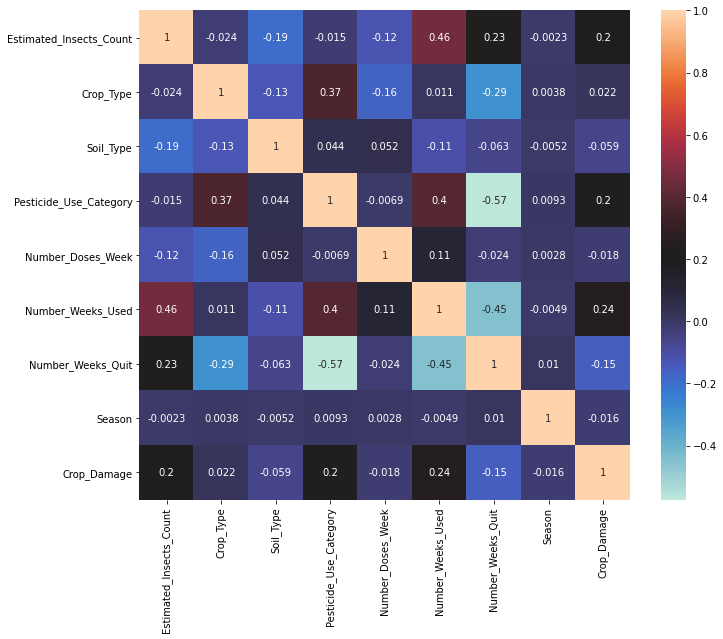

In [16]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap="icefire",annot=True)

As we can see Pesticide_Use_Category, Number_Weeks_Used, Number_Weeks_Quit columns are strongly correlated.

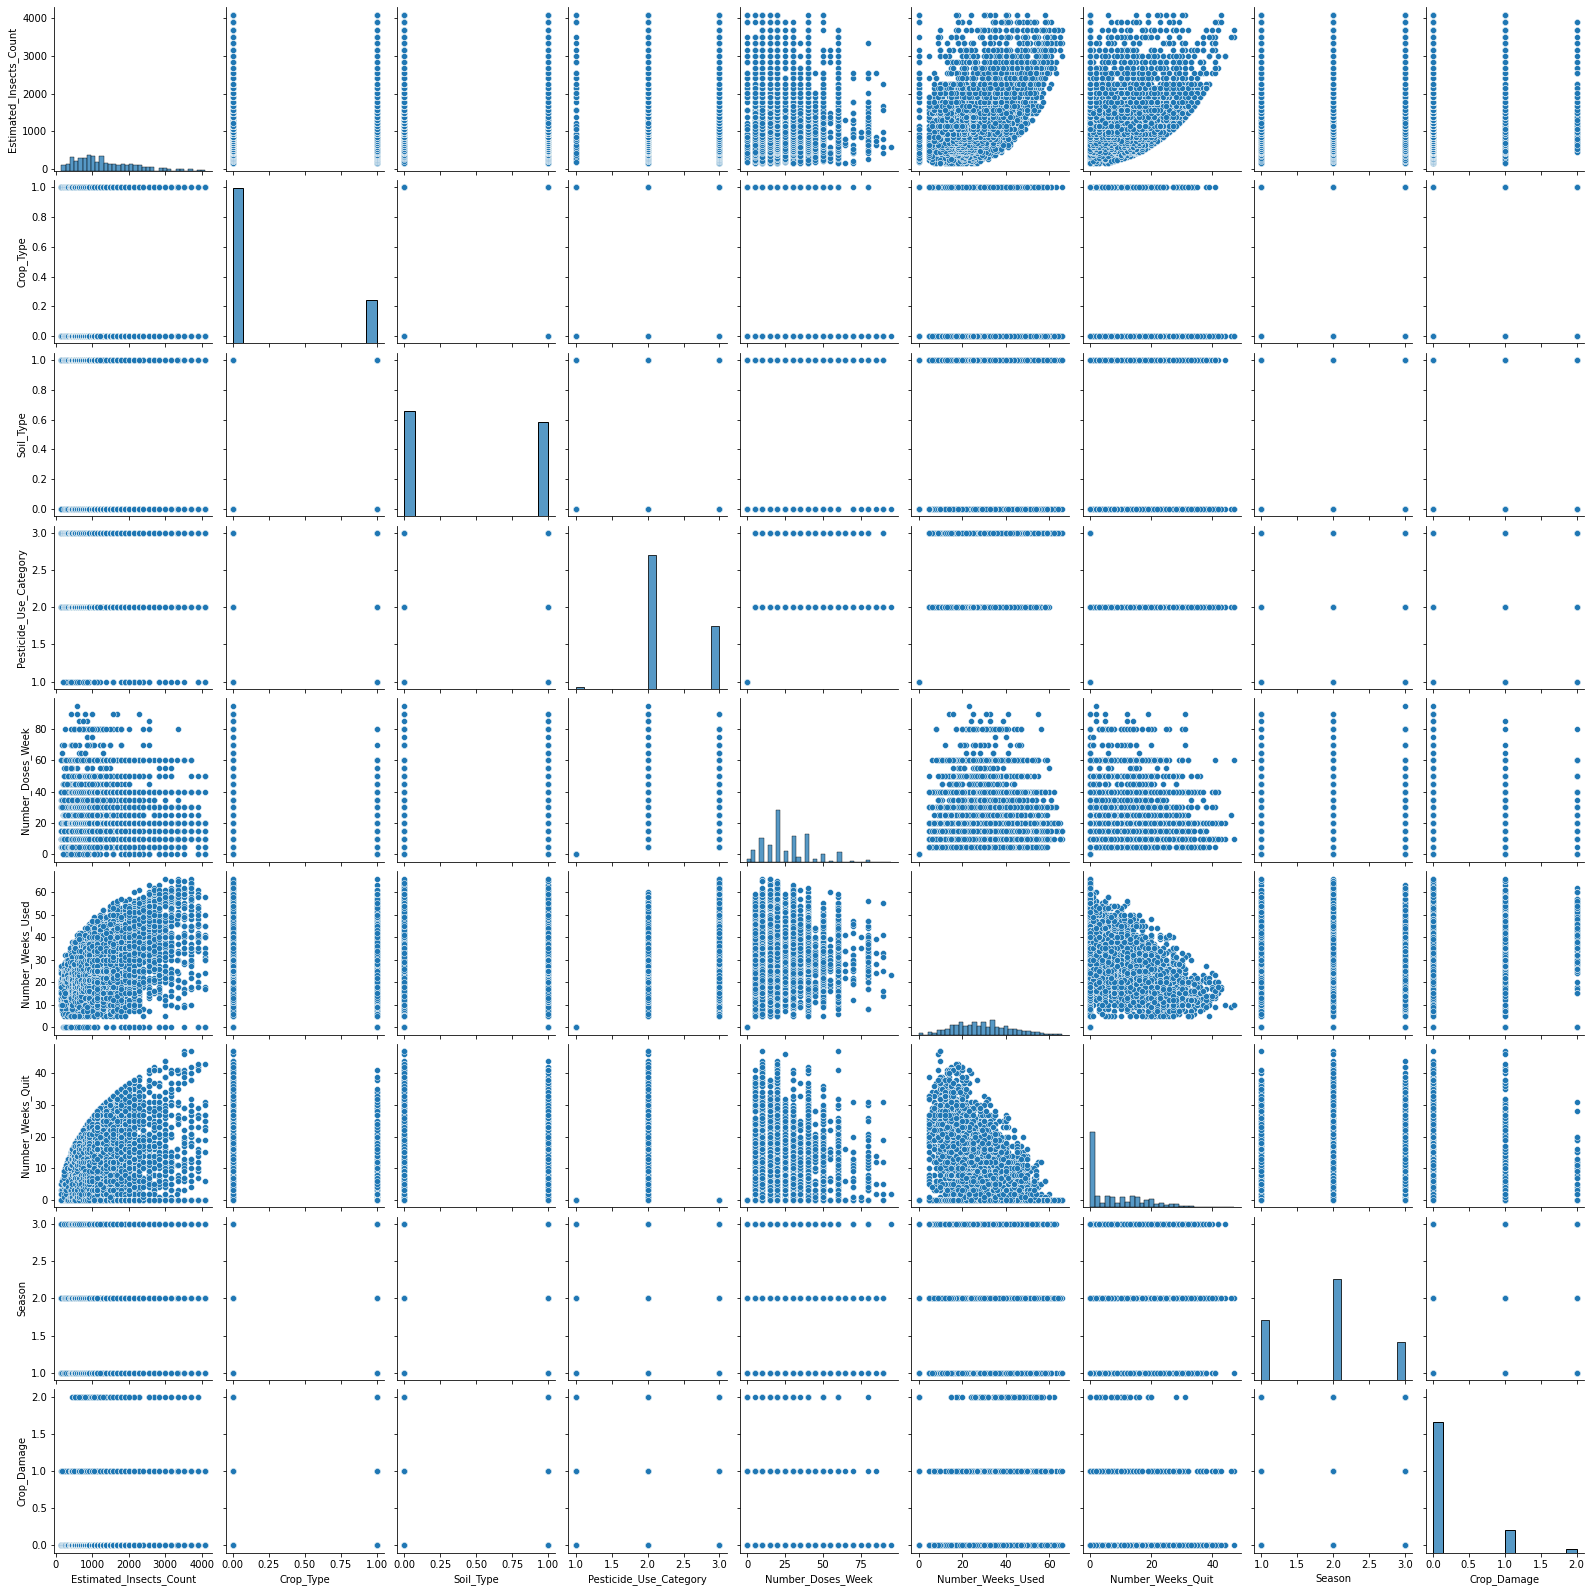

In [17]:
sns.pairplot(df,palette="mako")

Above is the pairplot of each attribute with target variable.

## Training the model

In [18]:
X  = A_train.loc[:,A_train.columns != "Crop_Damage"]
X = X.drop("ID",axis=1)
Y = A_train["Crop_Damage"]

In [19]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.75,
                                                    random_state=4)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score


Acc_matrix = []

Model_dict = {
"Support Vector Classifier": SVC(),
"Linear SVC": LinearSVC(),
"K Nearest Neighbor": KNeighborsClassifier(),
"Decision Tree Classifier": DecisionTreeClassifier(),
"Random Forest Classifier": RandomForestClassifier(),
"Gaussian NB" : GaussianNB() ,
"Stocastic Gradient Descent": SGDClassifier()
}

In [21]:
for i in Model_dict:
    Model_dict[i].fit(X_train, y_train)
    predict = Model_dict[i].predict(X_test)
    print("Score Of",i,"is : ",accuracy_score(y_test, predict)*100,'%\n')
    
    print("Errors : \n")
    print("Mean Absolute Error : ", mean_absolute_error(y_test,predict))
    print("Mean Squared Error : ", round(mean_squared_error(y_test, predict,squared=False), 2))
    Acc_matrix.append("{:.2f}".format( accuracy_score(y_test, predict)))
    print(cm(y_test, predict))
    print("\n****************************\n","\n\n\n")

Score Of Support Vector Classifier is :  83.91304347826087 %

Errors : 

Mean Absolute Error :  0.1826086956521739
Mean Squared Error :  0.48
[[965   0   0]
 [160   0   0]
 [ 25   0   0]]

****************************
 



Score Of Linear SVC is :  84.0 %

Errors : 

Mean Absolute Error :  0.1817391304347826
Mean Squared Error :  0.47
[[965   0   0]
 [159   1   0]
 [ 25   0   0]]

****************************
 



Score Of K Nearest Neighbor is :  82.78260869565217 %

Errors : 

Mean Absolute Error :  0.19043478260869565
Mean Squared Error :  0.48
[[925  40   0]
 [133  27   0]
 [ 21   4   0]]

****************************
 



Score Of Decision Tree Classifier is :  72.0 %

Errors : 

Mean Absolute Error :  0.3139130434782609
Mean Squared Error :  0.62
[[786 151  28]
 [111  40   9]
 [ 11  12   2]]

****************************
 



Score Of Random Forest Classifier is :  82.0 %

Errors : 

Mean Absolute Error :  0.19304347826086957
Mean Squared Error :  0.47
[[920  44   1]
 [135  22   

In [22]:
Acc_matrix

['0.84', '0.84', '0.83', '0.72', '0.82', '0.82', '0.71']

## Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
for i in Model_dict:
    score = cross_val_score(Model_dict[i],X_train,y_train,cv=4,scoring='accuracy')
    print("Score of",i," : \n\nScore :",score*100)
    print("Mean Score : ", score.mean())
    print("Standard Deviation : ", score.std())
    print("\n***************************\n")

Score of Support Vector Classifier  : 

Score : [82.73464658 82.83062645 82.83062645 82.71461717]
Mean Score :  0.8277762916282434
Standard Deviation :  0.0005346830491050548

***************************

Score of Linear SVC  : 

Score : [82.73464658 82.83062645 82.83062645 83.29466357]
Mean Score :  0.8292264076375241
Standard Deviation :  0.002183323447069557

***************************

Score of K Nearest Neighbor  : 

Score : [81.57589803 80.27842227 82.59860789 81.78654292]
Mean Score :  0.8155986777899358
Standard Deviation :  0.008325746495443225

***************************

Score of Decision Tree Classifier  : 

Score : [72.76940904 73.20185615 73.78190255 74.01392111]
Mean Score :  0.7344177221315598
Standard Deviation :  0.004880253500052671

***************************

Score of Random Forest Classifier  : 

Score : [80.8806489  81.20649652 81.78654292 82.36658933]
Mean Score :  0.8156006941737263
Standard Deviation :  0.005675364852349186

***************************

Sco

## Comparing Accuracy Score of Models.

In [24]:
data = zip(Model_dict.keys(),Acc_matrix)
df_score = pd.DataFrame(data, columns = ['Model', 'Accuracy_Score']) 
df_score.sort_values('Accuracy_Score', ascending=False)

,Model,Accuracy_Score
0,Support Vector Classifier,0.84
1,Linear SVC,0.84
2,K Nearest Neighbor,0.83
4,Random Forest Classifier,0.82
5,Gaussian NB,0.82
3,Decision Tree Classifier,0.72
6,Stocastic Gradient Descent,0.71


Now from above table we can see that SVC, Linear SVC, and SGD models are giving same accuracy that is 84%, but these models we can not use furthur as per confusion matrix these models gives only single type of prediction.
These models are not considering the other two parameters which are contributing towards damage the Crop.
So we will choose Random Forest Classifier as a best model for this type of problem.
Though the accuracy is less but its working on the all the parameters which leads to Crop Damage.


## Hyper-parameter tunning

In [25]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier() 

gcv = GridSearchCV(
    rfc, 
    param_grid=param_grid
).fit(X,Y)

In [26]:
gcv.best_params_ # selecting the best parameters.

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [32]:
rfc = RandomForestClassifier(
                    criterion = 'gini', 
                    max_depth =  4,
                    max_features = "auto",
                    n_estimators = 200) 

rfc.fit(X_train,y_train)
predict = rfc.predict(X_test)
print("Score Of model is : ",accuracy_score(y_test, predict)*100,'%\n')
print(cm(y_test, predict))

Score Of model is :  84.60869565217392 %

[[964   1   0]
 [151   9   0]
 [ 25   0   0]]


In [28]:
rfc_default = RandomForestClassifier() 

rfc_default.fit(X_train,y_train)
predict = rfc_default.predict(X_test)
print("Score Of model is : ",accuracy_score(y_test, predict)*100,'%\n')
print(cm(y_test, predict))

Score Of model is :  82.17391304347827 %

[[918  44   3]
 [131  26   3]
 [ 14  10   1]]


## Since RFC with default values gives less accuracy but better spread we choose RFC_default over hyperparameter tuned random forset classifier

In [29]:
A_test_df = A_test.drop("ID",axis=1)
A_test["Crop_Damage"] = rfc_default.predict(A_test_df)

In [30]:
A_test.Crop_Damage.unique()

array([1, 2, 0], dtype=int64)

In [31]:
from joblib import dump, load
dump(rfc_default, 'rfc_default.joblib')

['rfc_default.joblib']